# Author

***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

# Import modules

In [73]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from keras.datasets import cifar10

np.random.seed(11)

In [3]:
iris = datasets.load_iris()
irisX = iris.data
irisy = iris.target

C = len(np.unique(irisy))

print(f'Number of classes: {C}')
print(f'Number of data points: {len(irisy)}')

X0 = irisX[irisy == 0, :]
X1 = irisX[irisy == 1, :]
X2 = irisX[irisy == 2, :]

X_train, X_test, y_train, y_test = train_test_split(irisX, irisy, test_size=50)

Number of classes: 3
Number of data points: 150


# Using Scikit-Learn

In [4]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1, p = 2)
knn.fit(X_train, y_train)
y_pred_sci = knn.predict(X_test)

In [5]:
print(y_test)
print(y_pred_sci)
print(f'Accuracy of 1KNN: {100 * accuracy_score(y_test, y_pred_sci)}%')

[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1 0 2 2 0 0 2 2
 1 0 1 1 2 0 1 2 1 1 0 2 0]
[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1 0 2 2 0 0 2 2
 1 0 2 1 2 0 1 2 1 1 0 2 0]
Accuracy of 1KNN: 94.0%


# Implementation

In [68]:
class K_NearestNeighbors:

  __colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
  __descrb = ['s', 'o', '^', 'p', '<', '.', 'x', '*']
  
  def __init__(self, n_neighbors=1, p=2):
    if n_neighbors < 1:
      raise ValueError('Illegal Argument Exception')

    self.n_neighbors = n_neighbors
    self.p = p
    self.__f = None

  def __major_voting(self, k_nearest, dt):
    # major voting
    vote_list = [0] * len(self.__C)
    for i in k_nearest:
      vote_list[self.__y[i]] += 1
    return np.argmax(vote_list)

  def __dist_inv(self, k_nearest, dt):
    #distance
    vote_list = [0] * len(self.__C)
    for i in k_nearest:
      if np.linalg.norm(self.__X[i] - dt) < 1e-4:
        return self.__y[i]
      
      vote_list[self.__y[i]] += 1 / np.linalg.norm(self.__X[i] - dt)
    return np.argmax(vote_list)
  
  def fit(self, X, y, weights = 'uniform'):
    if self.n_neighbors > len(X_train):
      raise TypeError('n_neighbors did not in range')
    
    self.__X = X
    self.__y = y
    self.__f = self.__major_voting if weights == 'uniform' else self.__dist_inv
    self.__C = np.unique(self.__y)
    
    return self

  def predict(self, X):
    y_pred = []
    for dt in X:
      dis = cdist(self.__X, dt.reshape(1, -1), p=self.p).T[0]
      k_nearest= np.argpartition(dis, self.n_neighbors)[:self.n_neighbors]
      y_pred.append(self.__f(k_nearest, dt))

    return np.asarray(y_pred)

  def visualize(self, x_axis, y_axis, n_=200, dpi=100, figz=(16, 9)):
    if self.__X.shape[1] != 2:
      raise ValueError('dimension of each point must be 2!')
    plt.figure(dpi=dpi, figsize=figz)

    x_ = np.linspace(x_axis[0], x_axis[1], n_)
    y_ = np.linspace(y_axis[0], y_axis[1], n_)

    x_, y_ = np.meshgrid(x_, y_)
    x = np.vstack((x_.ravel(), y_.ravel())).T
    z = self.predict(x).reshape(n_, n_)

    plt.contourf(x_, y_, z, \
                 colors=['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'], alpha = .3)

    for i in range(len(self.__C)):
      xt = self.__X[self.__y == self.__C[i], :].T
      plt.plot(xt[0], xt[1], self.__colors[i] + self.__descrb[i], markeredgecolor='k')

    plt.show()


In [29]:
my_knn1 = K_NearestNeighbors(n_neighbors=1, p=2).fit(X_train, y_train)

y_pred_def = my_knn1.predict(X_test)

In [30]:
print(f'Ratio between my algorithm and scikit learn: {100 * accuracy_score(y_pred_def, y_pred_sci)}%')
print(f'Ratio between my algorithm and ground truth: {100 * accuracy_score(y_pred_def, y_test)}%')


Ratio between my algorithm and scikit learn: 100.0%
Ratio between my algorithm and ground truth: 94.0%


# Visualizing with my algorithm

For visualization, I create 500 training data points and 50000 test data points in order to fill chart which each vector has (2, 1) dimensions

In [ ]:
def knearest_display(X_v, y_v, X_v_test, y_predict):
  plt.figure(figsize=(10,10))

  X0_v = X_v[y_v == 0, :]
  X1_v = X_v[y_v == 1, :]
  X2_v = X_v[y_v == 2, :]
  X3_v = X_v[y_v == 3, :]

  x0 = X_v_test[y_predict == 0, :]
  x1 = X_v_test[y_predict == 1, :]
  x2 = X_v_test[y_predict == 2, :]
  x3 = X_v_test[y_predict == 3, :]

  plt.plot(X0_v[:, 0], X0_v[:, 1], 'bx')
  plt.plot(X1_v[:, 0], X1_v[:, 1], 'rx')
  plt.plot(X2_v[:, 0], X2_v[:, 1], 'gx')
  plt.plot(X3_v[:, 0], X3_v[:, 1], 'mx')

  plt.plot(x0[:, 0], x0[:, 1], 'b.')
  plt.plot(x1[:, 0], x1[:, 1], 'r.')
  plt.plot(x2[:, 0], x2[:, 1], 'g.')
  plt.plot(x3[:, 0], x3[:, 1], 'm.')

  plt.title('500 training data point, 50000 test data points, 5 nearest neighbors')
  plt.show()

In [44]:
X_v = 10 * np.random.rand(500, 2)

y_v = np.array([0] * 150 + [1] * 150 + [2] * 150 + [3] * 50)
# np.random.shuffle(y_v[100:200])

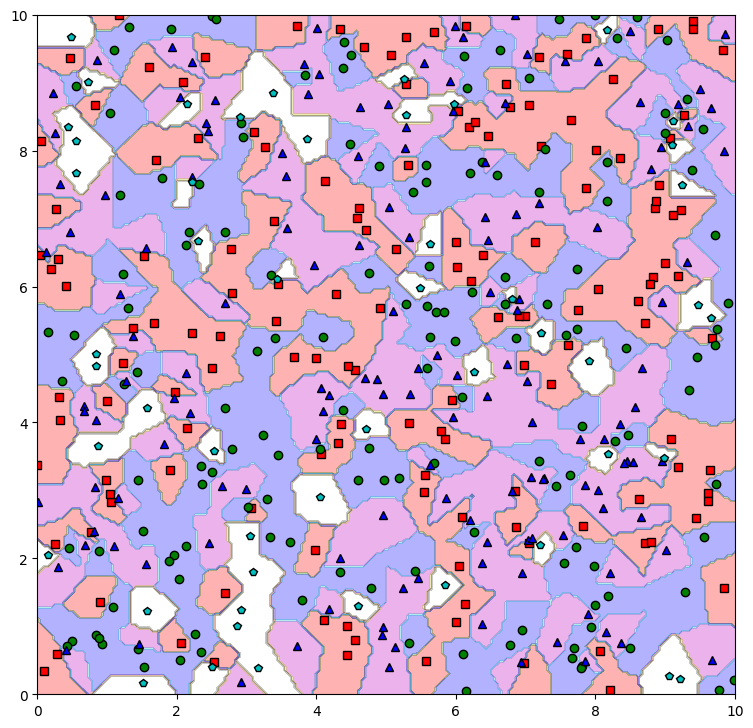

In [69]:
my_knn2 = K_NearestNeighbors(n_neighbors=1, p=2).fit(X_v, y_v)

# y_pred_2 = my_knn1.predict(X_test)
my_knn2.visualize([0, 10], [0, 10], figz=(9, 9))

The data looks pretty scattered, Let's use Kmeans Clustering to assign lable of each data point

Assuming the number of classes is 4

## Kmeans

In [46]:
def kmeans_init_centers(X, k):
  return X[np.random.choice(X.shape[0], k, replace = False)]

def kmeans_assign_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))

  for k in range(K):
    Xk = X[labels == k, :]
    centers[k, :] = np.mean(Xk, axis = 0)

  return centers

def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [71]:
def kmeans(X, K):

  centers = [kmeans_init_centers(X, K)]
  labels = []
  it = 0

  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1], K)
    if kmeans_has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it += 1

  return (centers, labels, it)

centers, labels, it = kmeans(X_v, 4)

# Application

- Find boundary of n clusters

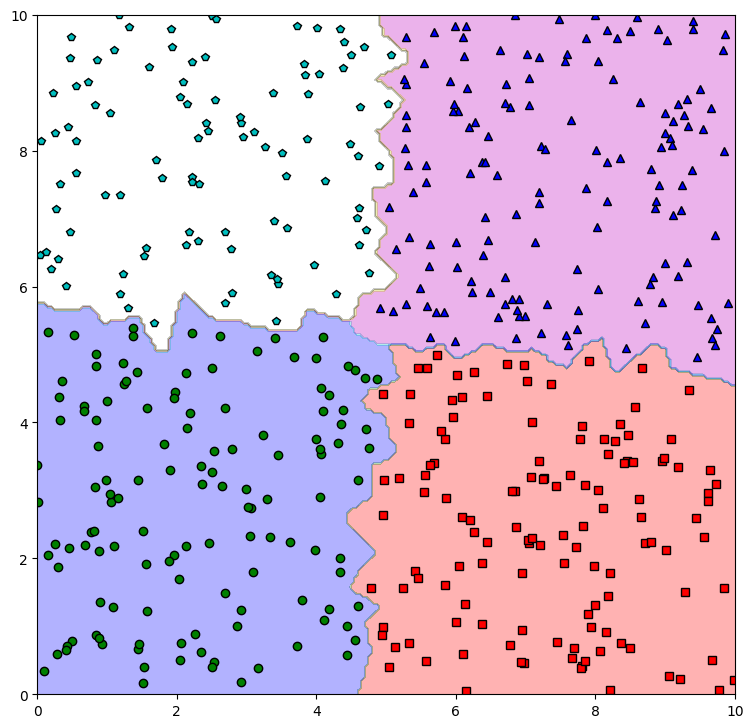

In [72]:
# y_v = labels[-1]

my_knn2 = K_NearestNeighbors(n_neighbors=1, p=2).fit(X_v, labels[-1])

# y_pred_2 = my_knn1.predict(X_test)
my_knn2.visualize([0, 10], [0, 10], figz=(9, 9))

# CIFAR-10 dataset

In [114]:
(x_tr, y_tr), (x_ts, y_ts) = cifar10.load_data()

# get the first 2000 train data and 200 test data
x_tr = x_tr[:4000] / 255.0
y_tr = y_tr[:4000].ravel()
x_ts = x_ts[:200] / 255.0
y_ts = y_ts[:200].ravel()

X_tr = x_tr.reshape(x_tr.shape[0], -1)
X_ts = x_ts.reshape(x_ts.shape[0], -1)

In [115]:
myknn3 = K_NearestNeighbors(n_neighbors=15, p=2).fit(X_tr, y_tr, weights='distance')

pred_y = myknn3.predict(X_ts)

In [116]:
print(pred_y)
print(y_ts)

print(f'Accuracy of KNN: {100 * accuracy_score(y_ts, pred_y)}%')

[4 8 8 8 4 4 2 2 2 8 0 8 4 6 4 8 5 3 8 6 4 0 0 6 2 4 4 7 4 2 6 2 4 6 8 4 2
 8 2 4 8 6 2 4 8 8 5 8 4 2 8 8 6 2 8 8 5 6 2 4 2 6 6 9 4 2 2 0 6 9 2 4 8 8
 8 2 8 5 6 8 8 6 4 0 0 8 2 8 8 8 8 4 8 2 4 4 4 0 0 4 4 4 6 3 4 8 2 6 5 5 4
 0 2 2 4 4 0 4 6 4 8 4 2 2 8 4 8 3 7 2 2 8 8 6 0 2 8 0 2 8 2 8 2 2 8 8 6 5
 5 5 8 3 4 8 4 4 0 8 6 8 0 4 2 4 0 4 8 2 6 0 8 7 2 8 2 9 2 4 6 8 8 0 2 4 2
 0 6 2 8 8 2 4 4 6 4 4 8 0 3 4]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6 6 5 4 5 9 2 4
 1 9 5 4 6 5 6 0 9 3 9 7 6 9 8 0 3 8 8 7 7 4 6 7 3 6 3 6 2 1 2 3 7 2 6 8 8
 0 2 9 3 3 8 8 1 1 7 2 5 2 7 8 9 0 3 8 6 4 6 6 0 0 7 4 5 6 3 1 1 3 6 8 7 4
 0 6 2 1 3 0 4 2 7 8 3 1 2 8 0 8 3 5 2 4 1 8 9 1 2 9 7 2 9 6 5 6 3 8 7 6 2
 5 2 8 9 6 0 0 5 2 9 5 4 2 1 6 6 8 4 8 4 5 0 9 9 9 8 9 9 3 7 5 0 0 5 2 2 3
 8 6 3 4 0 5 8 0 1 7 2 8 8 7 8]
Accuracy of KNN: 29.5%
